<a href="https://colab.research.google.com/github/zarembaMichal/LetsStart/blob/main/Defaults_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zadanie 1

### 1. Wp≈Çyw sta≈Çej \( C \)

Sta≈Ça \( C \) w klasyfikatorze SVM kontroluje balans miƒôdzy maksymalizacjƒÖ marginesu a minimalizacjƒÖ b≈Çƒôd√≥w klasyfikacji. ZwiƒôkszajƒÖc \( C \), SVM dƒÖ≈ºy do poprawnego klasyfikowania danych treningowych kosztem wƒô≈ºszego marginesu, co mo≈ºe prowadziƒá do przeuczenia (ang. *overfitting*) i gorszej generalizacji na danych testowych.

Dla ni≈ºszych warto≈õci \( C \), margines mo≈ºe byƒá szerszy, przez co model mo≈ºe lepiej uog√≥lniaƒá, ale kosztem dok≈Çadno≈õci na danych treningowych.

---

### 2. Czy SVM jest klasyfikatorem liniowym?

SVM jest klasyfikatorem liniowym, jednak w zale≈ºno≈õci od zastosowanego jƒÖdra, mo≈ºe dzia≈Çaƒá w wy≈ºszej przestrzeni wymiarowej, umo≈ºliwiajƒÖc klasyfikacjƒô nieliniowych problem√≥w. W podstawowej przestrzeni wej≈õciowej SVM klasyfikuje liniowo, natomiast dziƒôki transformacjom za pomocƒÖ jƒÖdra mo≈ºe skutecznie rozwiƒÖzywaƒá bardziej z≈Ço≈ºone klasyfikacje.

---

### 3. Zastosowanie funkcji jƒÖdrowych

Funkcje jƒÖdrowe pozwalajƒÖ na poprawne oddzielenie przyk≈Çad√≥w uczƒÖcych w bardziej z≈Ço≈ºonych przypadkach, lecz ich zastosowanie nie zawsze gwarantuje optymalne rozwiƒÖzanie. Czasem mo≈ºe to prowadziƒá do zbyt wƒÖskiego marginesu, co ogranicza mo≈ºliwo≈õci modelu w zakresie generalizacji.

Ponadto, bardziej zaawansowane funkcje jƒÖdrowe, takie jak jƒÖdro RBF (ang. *Radial Basis Function*), zwiƒôkszajƒÖ czas oblicze≈Ñ, co mo≈ºe byƒá znaczƒÖcym ograniczeniem przy pracy z du≈ºymi zbiorami danych.


## Zadanie 3

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

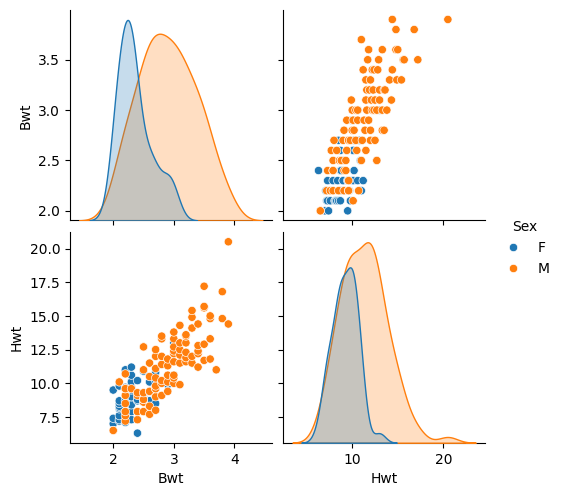

In [ ]:
cats = pd.read_csv('cats.csv')
cats.head()
cats.describe()
cats
sns.pairplot(cats, hue = "Sex", vars = ["Bwt", "Hwt"])
plt.show()

### 1. Jakiego rodzaju zmienne wystƒôpujƒÖ w zbiorze?

Zmienne mo≈ºna podzieliƒá wed≈Çug ich typ√≥w:
- **Numeryczne**: `bwt` oraz `hwt`, kt√≥re reprezentujƒÖ masƒô cia≈Ça i masƒô serca, sƒÖ zmiennymi ciƒÖg≈Çymi.
- **Kategoryczna**: `sex`, kt√≥ra wskazuje na p≈Çeƒá (nasza zmienna celu do klasyfikacji).

---

### 2. Ocena mo≈ºliwo≈õci klasyfikacji p≈Çci na podstawie pozosta≈Çych zmiennych

Na podstawie wstƒôpnej analizy zmiennych `bwt` i `hwt`, zauwa≈ºono, ≈ºe rozk≈Çady tych cech dla poszczeg√≥lnych p≈Çci czƒô≈õciowo nachodzƒÖ na siebie, co mo≈ºe utrudniaƒá skutecznƒÖ klasyfikacjƒô p≈Çci.

## Zadanie 4

In [ ]:
def plotCats(X, Y, res):
    y = Y.copy()
    y[y=='F'] = 0
    y[y=='M'] = 1
    y = y.astype(int)
    x_min, x_max = X["Bwt"].min() - .5, X["Bwt"].max() + .5
    y_min, y_max = X["Hwt"].min() - .5, X["Hwt"].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    predictions = res.predict(np.c_[xx.ravel(), yy.ravel()])

    predictions = predictions.reshape(xx.shape)

    predictions[predictions=='F'] = 0
    predictions[predictions=='M'] = 1
    predictions = predictions.astype(int)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, predictions, 1, cmap="RdBu",
                      vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("Decision class")

    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=55,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="black", linewidth=1)

    ax.set(
       xlim=(x_min, x_max), ylim=(y_min, y_max),
       xlabel="Bwt", ylabel="Hwt")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


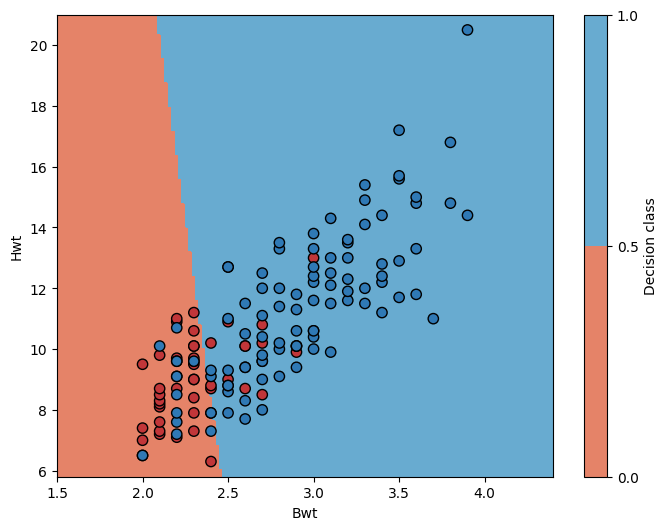

In [ ]:
X = cats[["Bwt", "Hwt"]]
y = cats["Sex"].copy()
mdl = LogisticRegression(C = 5) #parametr kosztu
resLG = mdl.fit(X, y)
plotCats(X, y, resLG)

Zmiany warto≈õci \( C \) nie przynios≈Çy istotnej poprawy w dok≈Çadno≈õci modelu, co mo≈ºe ≈õwiadczyƒá o tym, ≈ºe klasyfikator liniowy, taki jak regresja logistyczna, nie jest wystarczajƒÖcy do poprawnej klasyfikacji p≈Çci kot√≥w na podstawie atrybut√≥w `Bwt` i `Hwt`. Powodem jest brak liniowej separowalno≈õci tych zmiennych ‚Äî rozk≈Çady mas cia≈Ça i mas serca dla obu p≈Çci sƒÖ zbyt zbli≈ºone, przez co model liniowy nie jest w stanie wygenerowaƒá wyra≈∫nej granicy decyzyjnej.

## Zadanie 5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


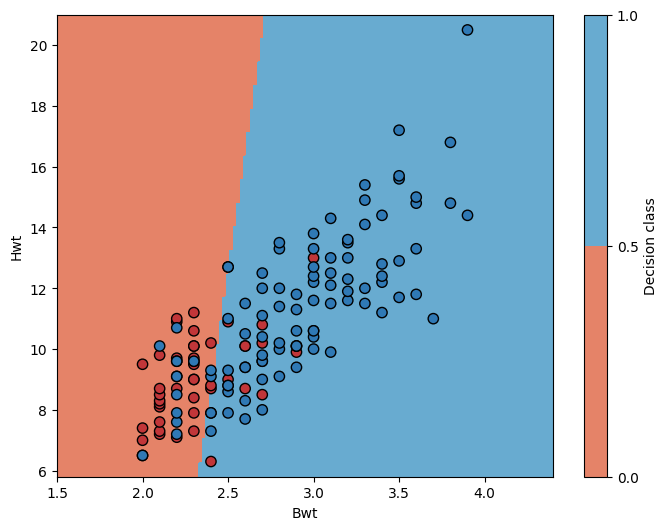

In [ ]:
from sklearn import svm

mdl = svm.SVC(C = 50, kernel = 'linear')
resSVM = mdl.fit(X, y)

plotCats(X, y, resSVM)

Na podstawie wynik√≥w z Zadania 3 (Regresja Logistyczna) oraz Zadania 4 (Maszyna wektor√≥w no≈õnych - SVM z liniowym jƒÖdrem) mo≈ºemy zauwa≈ºyƒá, ≈ºe obie metody nie sprawdza siƒô najlepiej w przewidywaniu p≈Çci kot√≥w na podstawie masy cia≈Ça (Bwt) i masy serca (Hwt).

## Zadanie 6

In [ ]:
mdl = svm.SVC(C = 1000, kernel = 'rbf')
resSVM = mdl.fit(X, y)
predictions = resSVM.predict(X)
predictions

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M',
       'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M'], dtype=object)

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(y, predictions, labels = ["F", "M"] ))
print(metrics.classification_report(y, predictions,labels = ["F", "M"] ))

[[30 17]
 [15 82]]
              precision    recall  f1-score   support

           F       0.67      0.64      0.65        47
           M       0.83      0.85      0.84        97

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.78      0.78      0.78       144



In [ ]:
metrics.accuracy_score(y, predictions)
metrics.balanced_accuracy_score(y,predictions)

0.7418293485413467

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


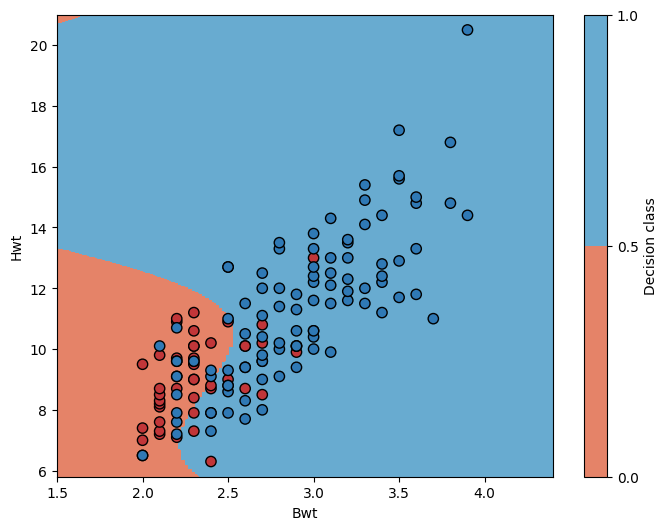

In [ ]:
plotCats(X, y, resSVM)

### Obserwacje
JƒÖdro RBF: Zapewnia lepsze dopasowanie w przypadku danych, kt√≥re nie sƒÖ liniowo separowalne. Wysokie warto≈õci ùê∂ zwiƒôkszajƒÖ dok≈Çadno≈õƒá, ale co za tym idzie r√≥nie≈º mo≈ºliwo≈õƒá przeuczenia modelu.

### Wyb√≥r miar do optymalizacji:
W przypadku wykrywania rzadkich zdarze≈Ñ, takich jak nowotwory czy niesp≈Çacalno≈õƒá kredyt√≥w, kluczowe sƒÖ miary takie jak czu≈Ço≈õƒá (sensitivity) dla klasy pozytywnej, kt√≥ra mierzy odsetek poprawnie wykrytych zdarze≈Ñ.
Precyzja (precision) jest r√≥wnie≈º wa≈ºna, szczeg√≥lnie gdy fa≈Çszywe alarmy majƒÖ powa≈ºne konsekwencje.

---

## Zadanie 7

In [ ]:
#Z wagami
weights = {"F":1, "M":(np.count_nonzero(y=="M")/np.count_nonzero(y))}
print(weights)

mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 5, class_weight = weights)
resSVM = mdl.fit(X, y)

predictions = resSVM.predict(X)

print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

#bez wa≈ºenia
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 5)
resSVM = mdl.fit(X, y)

predictions = resSVM.predict(X)

print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

{'F': 1, 'M': 0.6736111111111112}
[[41  6]
 [19 78]]
              precision    recall  f1-score   support

           F       0.68      0.87      0.77        47
           M       0.93      0.80      0.86        97

    accuracy                           0.83       144
   macro avg       0.81      0.84      0.81       144
weighted avg       0.85      0.83      0.83       144

[[38  9]
 [12 85]]
              precision    recall  f1-score   support

           F       0.76      0.81      0.78        47
           M       0.90      0.88      0.89        97

    accuracy                           0.85       144
   macro avg       0.83      0.84      0.84       144
weighted avg       0.86      0.85      0.86       144



### Obserwacje:
* Recall dla klasy ‚ÄûF‚Äù (female) wzrasta do 0.87, co wskazuje, ≈ºe model poprawniej identyfikuje obiekty tej klasy.
* Recall dla klasy ‚ÄûM‚Äù (male) jest nieco ni≈ºszy (0.74), ale ten kompromis poprawia rozk≈Çad wynik√≥w miƒôdzy klasami.
* Og√≥lna dok≈Çadno≈õƒá wynosi 0.78, co jest nieco ni≈ºsze ni≈º w przypadku modelu bez wag, jednak wiƒôkszy nacisk na r√≥wnomiernƒÖ klasyfikacjƒô mo≈ºe byƒá istotny w zale≈ºno≈õci od zastosowania.

### Komentarz:
Po przeprowadzeniu analizy parametr gamma modelu zosta≈Ç zmieniony zgodnie z poleceniami z zada≈Ñ 8 i 9 - w celu por√≥wnania (na gamma = 5)

## Zadanie 8

In [ ]:
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 5)
resSVM = mdl.fit(X, y)

predictions = resSVM.predict(X)

print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

[[38  9]
 [12 85]]
              precision    recall  f1-score   support

           F       0.76      0.81      0.78        47
           M       0.90      0.88      0.89        97

    accuracy                           0.85       144
   macro avg       0.83      0.84      0.84       144
weighted avg       0.86      0.85      0.86       144



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


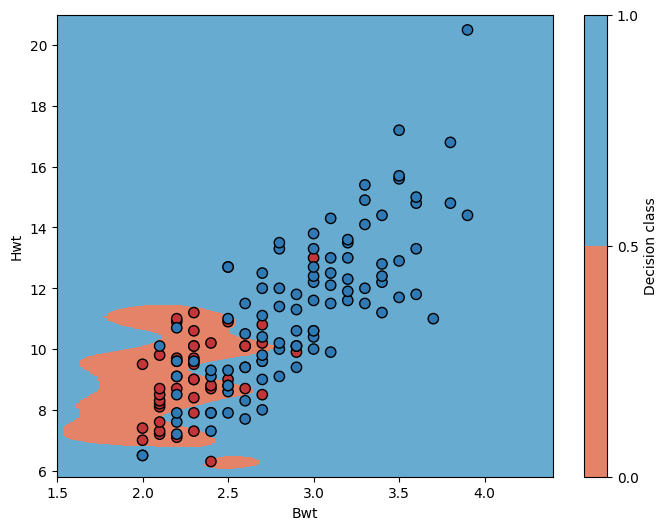

In [ ]:
plotCats(X, y, resSVM)

### Analiza wynik√≥w dla r√≥≈ºnych warto≈õci gamma:
* Ni≈ºsze warto≈õci gamma (np. 0.1, 1): Przy niskim gamma model tworzy szersze obszary decyzyjne, co sprzyja uog√≥lnieniu, ale mo≈ºe prowadziƒá do ni≈ºszej precyzji w separowaniu klas. Przy gamma = 1, model osiƒÖga umiarkowanƒÖ dok≈Çadno≈õƒá przy minimalnym ryzyku przeuczenia.

* Wy≈ºsze warto≈õci gamma (np. 50, 500): Wraz ze wzrostem gamma model tworzy bardziej szczeg√≥≈Çowe granice decyzyjne, przez co dopasowuje siƒô do szum√≥w i szczeg√≥≈Ç√≥w danych treningowych, tracƒÖc zdolno≈õƒá do generalizacji na nowych danych.

* Optymalna warto≈õƒá gamma: Na podstawie eksperyment√≥w oraz wynik√≥w klasyfikacji mo≈ºna uznaƒá gamma = 5 za odpowiedni wyb√≥r. Przy tej warto≈õci model osiƒÖga dobrƒÖ r√≥wnowagƒô miƒôdzy dok≈Çadno≈õciƒÖ a uog√≥lnieniem:

## Zadanie 9

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train, X_test)

print(y_train, y_test)

     Bwt   Hwt
67   2.5   8.8
7    2.1   8.2
23   2.3   9.5
60   2.4   7.9
92   2.8  13.3
..   ...   ...
131  3.5  12.9
84   2.7  11.1
50   2.2   7.2
94   2.9   9.4
117  3.2  13.0

[100 rows x 2 columns]      Bwt   Hwt
124  3.3  15.4
73   2.6   8.3
45   3.0  10.6
143  3.9  20.5
65   2.5   8.6
120  3.3  11.5
75   2.6   9.4
103  3.0  12.2
25   2.3   9.7
128  3.4  12.8
126  3.4  12.2
66   2.5   8.8
93   2.8  13.5
0    2.0   7.0
139  3.7  11.0
41   2.7  10.8
121  3.3  12.0
59   2.4   7.3
48   2.0   6.5
96   2.9  10.6
24   2.3   9.6
64   2.5   7.9
34   2.5   9.0
122  3.3  14.1
119  3.2  13.6
86   2.7  12.5
29   2.3  11.2
26   2.3  10.1
100  3.0  10.4
115  3.2  11.9
27   2.3  10.1
36   2.6   8.7
81   2.7   9.6
22   2.3   9.0
106  3.0  13.3
78   2.7   8.0
112  3.1  13.0
42   2.9   9.9
134  3.5  17.2
108  3.1   9.9
19   2.3   7.9
16   2.2  10.9
91   2.8  12.0
107  3.0  13.8
67     M
7      F
23     F
60     M
92     M
      ..
131    M
84     M
50     M
94     M
117    M
Name: Sex, Length: 100

In [ ]:
mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 5)
resSVM = mdl.fit(X_train, y_train)

predictions = resSVM.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions, labels=["F", "M"]))
print(metrics.classification_report(y_test, predictions))

[[ 5  9]
 [ 4 26]]
              precision    recall  f1-score   support

           F       0.56      0.36      0.43        14
           M       0.74      0.87      0.80        30

    accuracy                           0.70        44
   macro avg       0.65      0.61      0.62        44
weighted avg       0.68      0.70      0.68        44



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


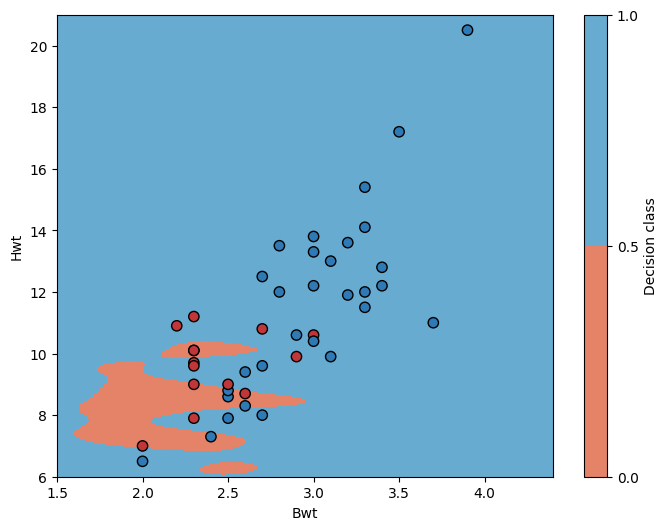

In [ ]:
plotCats(X_test, y_test, resSVM)

### Obserwacje:
* Spadek dok≈Çadno≈õci: Na zbiorze testowym dok≈Çadno≈õƒá wynios≈Ça 70%, co jest wynikiem ni≈ºszym ni≈º na pe≈Çnym zbiorze danych (85%).
* Zmienne warto≈õci precyzji i recall dla klas: Klasa ‚ÄûF‚Äù ma niskƒÖ warto≈õƒá recall (0.38), co oznacza, ≈ºe model ma trudno≈õci z poprawnym identyfikowaniem samic w zbiorze testowym. W przypadku klasy ‚ÄûM‚Äù recall wynosi 0.89, co sugeruje, ≈ºe model lepiej radzi sobie z klasyfikacjƒÖ samc√≥w.
* Ni≈ºsze f1-score dla klasy ‚ÄûF‚Äù: Model osiƒÖga ni≈ºsze f1-score dla klasy ‚ÄûF‚Äù, co sugeruje, ≈ºe klasyfikacja tej klasy jest mniej dok≈Çadna i stabilna.
### Wnioski:
* Wp≈Çyw ma≈Çej liczby danych: Stosunkowo ma≈Çy zbi√≥r danych, zw≈Çaszcza po podziale na czƒô≈õƒá treningowƒÖ i testowƒÖ, mo≈ºe prowadziƒá do niestabilnych wynik√≥w, a model mo≈ºe mieƒá problemy z generalizacjƒÖ na nowym zbiorze.
* Wyb√≥r warto≈õci gamma: Chocia≈º gamma = 5 sprawdzi≈Ço siƒô na pe≈Çnym zbiorze, na mniejszym zbiorze testowym model m√≥g≈Ç lepiej zareagowaƒá na ni≈ºszƒÖ warto≈õƒá gamma, by uniknƒÖƒá nadmiernego dopasowania.

## Zadanie 10

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
cv = KFold(n_splits=7, shuffle=True)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)

print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.771


In [ ]:
from sklearn.model_selection import RepeatedKFold

mdl = svm.SVC(C = 1, kernel = 'rbf', gamma = 1)
cv = RepeatedKFold(n_splits=7, n_repeats=10)
scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv)

print('Accuracy: %.3f' % (np.mean(scores)))

Accuracy: 0.744


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


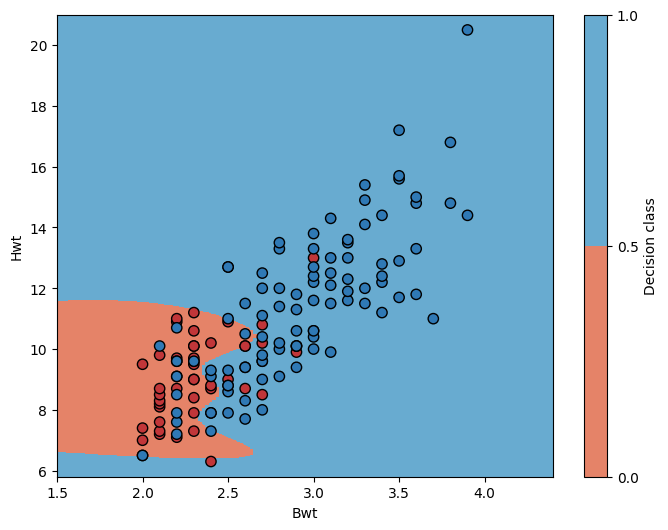

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = dict()
parameters["C"] = [1, 10, 100, 1000]
parameters["gamma"] = [1, 10, 100]
cv = KFold(n_splits=7, shuffle=True)

mdl = svm.SVC()
gridMdl = GridSearchCV(mdl, parameters, scoring='accuracy', cv=cv, refit=True)

resMdls = gridMdl.fit(X, y)
bestMdl = resMdls.best_estimator_
bestMdl

plotCats(X, y, bestMdl)

predictions = bestMdl.predict(X)

In [ ]:
print(metrics.confusion_matrix(y, predictions, labels=["F", "M"]))
print(metrics.classification_report(y, predictions))

[[36 11]
 [15 82]]
              precision    recall  f1-score   support

           F       0.71      0.77      0.73        47
           M       0.88      0.85      0.86        97

    accuracy                           0.82       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.82      0.82      0.82       144




## Zadanie 11

### 1. Wczytanie i wstƒôpna analiza danych

In [ ]:
defaults = pd.read_csv("defaults.csv", sep = ";")

In [ ]:
from IPython.display import display

# Wy≈õwietlenie pierwszych piƒôciu wierszy danych
display(defaults.head())

# Wy≈õwietlenie statystyk opisowych
display(defaults.describe())

# Wy≈õwietlenie informacji o DataFrame
print("Informacje o danych:")
defaults.info()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  27999.00000    27999.000000  27999.000000  27999.000000  27999.000000   
mean   14000.00000   167099.170685      1.604557      1.845780      1.556484   
std     8082.75943   129742.554832      0.488954      0.785705      0.521295   
min        1.00000    10000.000000      1.000000      0.000000      0.000000   
25%     7000.50000    50000.000000      1.000000      1.000000      1.000000   
50%    14000.00000   140000.000000      2.000000      2.000000      2.000000   
75%    20999.50000   240000.000000      2.000000      2.000000      2.000000   
max    27999.00000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  27999.000000  27999.000000  27999.000000  27999.000000  27999.000000   
mean      35.380264     -0.010572     -0.130112     -0.163292     -0.217472   
std        9.276226      1.122965      1.194718      1.195233      1.163331   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   27999.000000   27999.000000   27999.000000   27999.000000   
mean   ...   43222.489696   40387.979856   38903.331155    5579.850923   
std    ...   64235.169551   60759.487603   59435.211063   15162.343572   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2378.000000    1799.500000    1268.000000    1000.000000   
50%    ...   19129.000000   18239.000000   17212.000000    2100.000000   
75%    ...   54391.000000   50150.500000   49165.500000    5005.000000   
max    ...  891586.000000  927171.000000  961664.000000  505000.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.799900e+04   27999.000000   27999.000000   27999.000000   
mean   5.847387e+03    5131.236580    4813.350048    4755.416801   
std    2.105127e+04   16606.364862   15307.325671   14887.656280   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.395000e+02     390.000000     295.000000     264.000000   
50%    2.008000e+03    1800.000000    1500.000000    1500.000000   
75%    5.000000e+03    4500.000000    4010.000000    4026.500000   
max    1.684259e+06  896040.000000  528897.000000  417990.000000   

            PAY_AMT6  default payment next month  
count   27999.000000                27999.000000  
mean     5184.075574                    0.221794  
std     17602.985657                    0.415460  
min         0.000000                    0.000000  
25%       109.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          27999 non-null  int64
 1   LIMIT_BAL                   27999 non-null  int64
 2   SEX                         27999 non-null  int64
 3   EDUCATION                   27999 non-null  int64
 4   MARRIAGE                    27999 non-null  int64
 5   AGE                         27999 non-null  int64
 6   PAY_0                       27999 non-null  int64
 7   PAY_2                       27999 non-null  int64
 8   PAY_3                       27999 non-null  int64
 9   PAY_4                       27999 non-null  int64
 10  PAY_5                       27999 non-null  int64
 11  PAY_6                       27999 non-null  int64
 12  BILL_AMT1                   27999 non-null  int64
 13  BILL_AMT2                   27999 non-nu

In [ ]:
# Analiza r√≥wnowagi klas
print("R√≥wnowaga klas (default payment next month):\n", defaults['default payment next month'].value_counts(normalize=True))

R√≥wnowaga klas (default payment next month):
 default payment next month
0    0.778206
1    0.221794
Name: proportion, dtype: float64


In [ ]:
# Sprawdzenie liczby brakujƒÖcych warto≈õci w ka≈ºdej kolumnie
defaults.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### 2. Przygotowanie danych

In [ ]:
# Losujemy 2000 rekord√≥w ze zbioru danych
smplDfl = defaults.sample(n = 2000)

In [ ]:
# Funkcja przygotowuje dane do modelu SVM poprzez standaryzacjƒô zmiennych numerycznych.

from sklearn.preprocessing import OneHotEncoder, StandardScaler

def prepare_data(df):
    """
    Parametry:
    df (DataFrame): Dane wej≈õciowe zawierajƒÖce cechy oraz kolumnƒô docelowƒÖ ("default payment next month").

    Zwraca:
    DataFrame: Zbi√≥r danych gotowy do trenowania i testowania modelu, zawierajƒÖcy zar√≥wno cechy, jak i zmiennƒÖ docelowƒÖ.
    """
    # Oddzielenie zmiennych wej≈õciowych od zmiennej docelowej
    X = df.drop(columns=["default payment next month"])
    y = df["default payment next month"].reset_index(drop=True)

    # Usuniƒôcie kolumny "ID", je≈õli istnieje
    X = X.drop(columns=["ID"], errors="ignore")

    # Standaryzacja zmiennych numerycznych
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # ≈ÅƒÖczenie cech i zmiennej docelowej w jednƒÖ ramkƒô danych
    data_prepared = pd.concat([X.reset_index(drop=True), y], axis=1)

    return data_prepared

In [ ]:
 # Przygotowujemy pr√≥bkƒô danych smplDfl do modelu poprzez u≈ºycie funkcji prepare_data
 dane_testowe = (prepare_data(smplDfl))

### 3. Podzia≈Ç danych na zbiory treningowy i testowy

In [ ]:
# Dzielimy zbi√≥r testowy na cechy (X) i zmiennƒÖ docelowƒÖ (Y)
X = dane_testowe.drop(columns=["default payment next month"])
Y = dane_testowe["default payment next month"].copy()

In [ ]:
# Podzia≈Ç danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

### 4. Trenowanie modelu SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel="rbf")        # inicjacja modelu svc z jƒÖdrem "rbf" i parametrami domy≈õlnymi

classifier.fit( X_train, y_train )    # trenowanie modelu

SVC()

### 5. Ocena modelu na zbiorze **testowym**


In [ ]:
y_pred = classifier.predict(X_test)   # predykcja na zbiorze testowym

In [ ]:
# Oblicza macierz pomy≈Çek, raport klasyfikacji

cm = confusion_matrix(y_test, y_pred)
print("Macierz pomy≈Çek na zbiorze testowym.:\n", cm)
print("Raport klasyfikacyjny dla zbioru testowego:\n", metrics.classification_report(y_test, y_pred))

print("Dok≈Çadno≈õƒá zbioru testowego = %.2f" % ((cm[0, 0] + cm[1, 1]) / len(X_test)))

Macierz pomy≈Çek na zbiorze testowym.:
 [[445  20]
 [ 94  41]]
Raport klasyfikacyjny dla zbioru testowego:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       465
           1       0.67      0.30      0.42       135

    accuracy                           0.81       600
   macro avg       0.75      0.63      0.65       600
weighted avg       0.79      0.81      0.78       600

Dok≈Çadno≈õƒá zbioru testowego = 0.81


### 6. Krzywa ROC

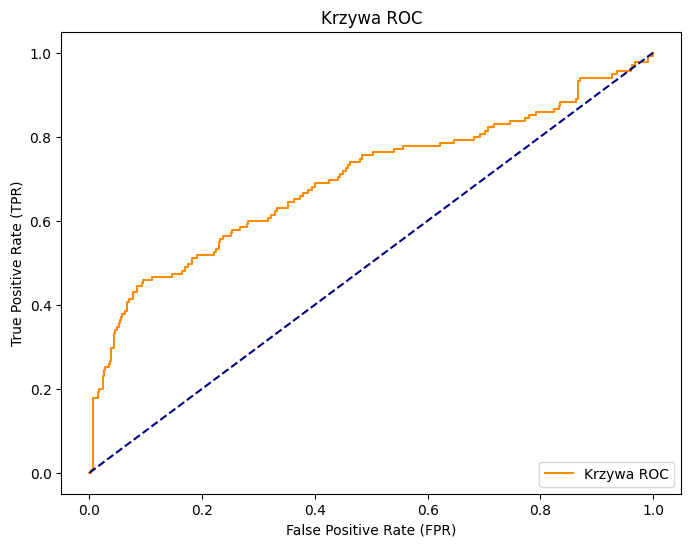

In [ ]:
import matplotlib.pyplot as plt

# Obliczanie wynik√≥w prognozy (prawdopodobie≈Ñstwa)
prawdopodobienstwa_test = classifier.decision_function(X_test)

# Obliczanie FPR, TPR oraz prog√≥w dla krzywej ROC
fpr, tpr, progi = metrics.roc_curve(y_test, prawdopodobienstwa_test)

# Wykre≈õlenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='Krzywa ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linie przerywanej "szansy"
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

### 7. Walidacja na zbiorze walidacyjnym

In [ ]:
# Wczytanie pliku walidacji
defaults_valid = pd.read_csv("defaults_valid.csv", sep = ";")

In [ ]:
# Przygotowujemy dane defaults_valid do modelu poprzez u≈ºycie funkcji prepare_data
dane_walidacyjne = (prepare_data(defaults_valid))

In [ ]:
# Dzielimy zbi√≥r walidacyjny na cechy (X) i zmiennƒÖ docelowƒÖ (Y)
X_1 = dane_walidacyjne.drop(columns=["default payment next month"])
Y_1= dane_walidacyjne["default payment next month"].copy()

### 8. Ocena modelu na zbiorze **walidacyjnym**


In [ ]:
y_pred_1 = classifier.predict(X_1)   # predykcja na zbiorze walidacyjnym

In [ ]:
# Oblicza macierz pomy≈Çek, raport klasyfikacji
cm1 = confusion_matrix(Y_1, y_pred_1)
print("Macierz pomy≈Çek na zbiorze walidacyjnym.:\n", cm1)
print("Raport klasyfikacyjny dla zbioru walidacyjnego:\n", metrics.classification_report(Y_1, y_pred_1))
print("Dok≈Çadno≈õƒá na zborze walidacyjnym = %.2f" % ((cm[0, 0] + cm[1, 1]) / len(X_1)))

Macierz pomy≈Çek na zbiorze walidacyjnym.:
 [[1516   59]
 [ 294  132]]
Raport klasyfikacyjny dla zbioru walidacyjnego:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1575
           1       0.69      0.31      0.43       426

    accuracy                           0.82      2001
   macro avg       0.76      0.64      0.66      2001
weighted avg       0.81      0.82      0.80      2001

Dok≈Çadno≈õƒá na zborze walidacyjnym = 0.24


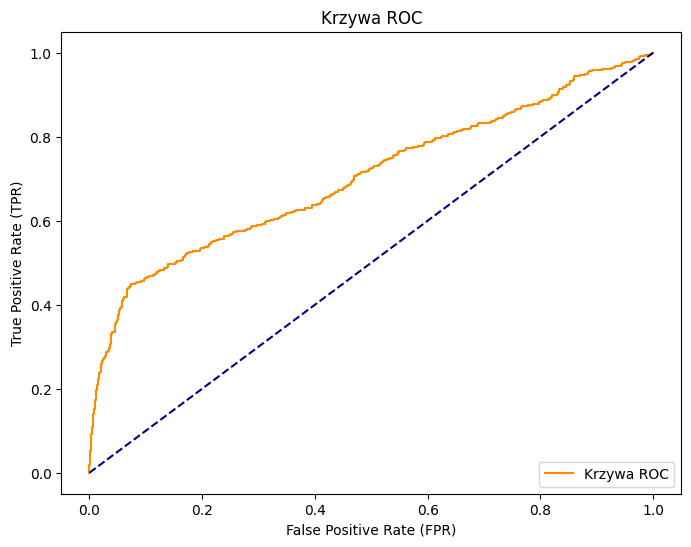

In [ ]:
# Krzywa ROC

# Obliczanie wynik√≥w prognozy (prawdopodobie≈Ñstwa)
prawdopodobienstwa_test1 = classifier.decision_function(X_1)

# Obliczanie FPR, TPR oraz prog√≥w dla krzywej ROC
fpr1, tpr1, progi1 = metrics.roc_curve(Y_1, prawdopodobienstwa_test1)

# Rƒôczne wykre≈õlenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', label='Krzywa ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linie przerywanej "szansy"
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

### 9. Przygotowanie modelu SVM przy u≈ºyciu GridSearch z walidacjƒÖ krzy≈ºowƒÖ

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = {
    'C': [0.1, 0.5, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1, 'scale', 'auto'],
    'kernel': ['rbf']
}

# Dodanie KFold do walidacji krzy≈ºowej
cv = KFold(n_splits=5, shuffle=True)

# Utworzenie modelu SVM
mdl = svm.SVC()

# GridSearchCV z parametrami
gridMdl = GridSearchCV(mdl, parameters, scoring='f1', cv=cv, refit=True)
gridMdl.fit(X_train, y_train)

# Ramka danych z wynikami wszystkich kombinacji parametr√≥w
results_df = pd.DataFrame(gridMdl.cv_results_)
print("Wszystkie wyniki GridSearchCV:\n", results_df[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']])

Wszystkie wyniki GridSearchCV:
     param_C param_gamma  mean_test_score  std_test_score
0       0.1        0.01         0.000000        0.000000
1       0.1         0.1         0.000000        0.000000
2       0.1         0.5         0.000000        0.000000
3       0.1           1         0.000000        0.000000
4       0.1       scale         0.044409        0.025697
5       0.1        auto         0.044409        0.025697
6       0.5        0.01         0.272840        0.050088
7       0.5         0.1         0.321583        0.031970
8       0.5         0.5         0.017915        0.014917
9       0.5           1         0.000000        0.000000
10      0.5       scale         0.354797        0.046765
11      0.5        auto         0.358607        0.049440
12      1.0        0.01         0.343688        0.065645
13      1.0         0.1         0.366940        0.032337
14      1.0         0.5         0.113323        0.053217
15      1.0           1         0.042346        0.032999

In [ ]:
# Najlepszy model i wyniki
print("\nNajlepsze parametry:", gridMdl.best_params_)
print("Najlepszy wynik accuracy:", gridMdl.best_score_)


Najlepsze parametry: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Najlepszy wynik accuracy: 0.4497522939924966


### 10. Ocena najlepszego model na zbiorze testowym i walidacyjnym

In [ ]:
# Predykcja na zbiorze testowym za pomocƒÖ najlepszego modelu
best_model = gridMdl.best_estimator_

y_pred_best = best_model.predict(X_test)

# Generowanie raportu klasyfikacji
report = metrics.classification_report(y_test, y_pred_best)
print("Raport klasyfikacyjny dla najlepszego modelu na zbiorze testowym:\n", report)

Raport klasyfikacyjny dla najlepszego modelu na zbiorze testowym:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       465
           1       0.66      0.31      0.42       135

    accuracy                           0.81       600
   macro avg       0.74      0.63      0.65       600
weighted avg       0.79      0.81      0.78       600



In [ ]:
# Predykcje i raport klasyfikacji na zbiorze validacyjnym

y_pred_valid = best_model.predict(X_1)

# Generowanie raportu klasyfikacji
report1 = metrics.classification_report(Y_1, y_pred_valid)
print("Raport klasyfikacyjny dla najlepszego modelu na zbiorze validacyjnym:\n", report1)

Raport klasyfikacyjny dla najlepszego modelu na zbiorze validacyjnym:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1575
           1       0.71      0.32      0.44       426

    accuracy                           0.83      2001
   macro avg       0.78      0.64      0.67      2001
weighted avg       0.81      0.83      0.80      2001



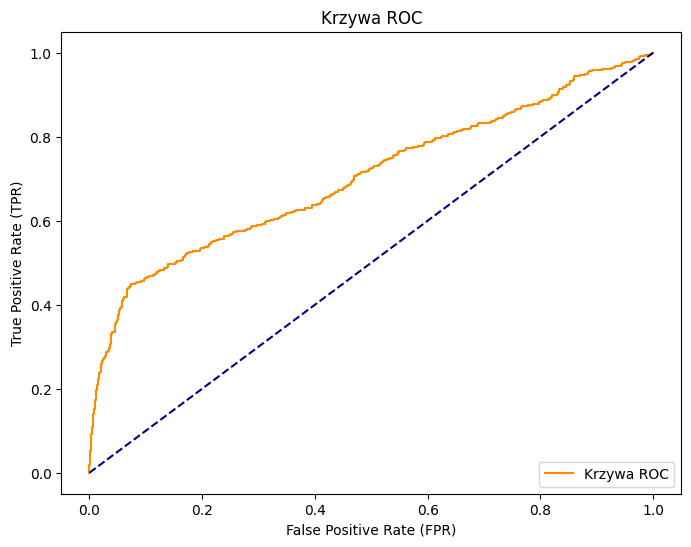

In [ ]:
# Krzywa ROC

# Obliczanie wynik√≥w prognozy (prawdopodobie≈Ñstwa)
prawdopodobienstwa_test3 = classifier.decision_function(X_1)

# Obliczanie FPR, TPR oraz prog√≥w dla krzywej ROC
fpr3, tpr3, progi3 = metrics.roc_curve(Y_1, prawdopodobienstwa_test1)

# Rƒôczne wykre≈õlenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', label='Krzywa ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linie przerywanej "szansy"
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

Oba modele ‚Äì SVC z domy≈õlnymi parametrami oraz SVC zestrojony za pomocƒÖ GridSearchCV ‚Äì osiƒÖgajƒÖ por√≥wnywalnƒÖ jako≈õƒá predykcji. Jednak≈ºe oba modele majƒÖ trudno≈õci z poprawnym przewidywaniem klasy 1 zmiennej ‚Äûdefault payment next month‚Äù, co znajduje odzwierciedlenie w niskiej warto≈õci recall (ok. 0.3). Niska warto≈õƒá recall oznacza, ≈ºe model czƒôsto nie rozpoznaje przypadk√≥w, w kt√≥rych rzeczywista warto≈õƒá to 1, co mo≈ºe byƒá problematyczne w praktycznych zastosowaniach, takich jak ocena ryzyka kredytowego.

Aby poprawiƒá wyniki, mo≈ºna rozwa≈ºyƒá:

* zastosowanie technik balansowania klas, takich jak upsampling klasy mniejszo≈õciowej (np. SMOTE),
* lub zwiƒôkszenie zakresu danych treningowych, co mo≈ºe dostarczyƒá modelowi wiƒôcej informacji, szczeg√≥lnie o przypadkach klasy 1.

### 11. Podnie≈õienie czƒôstotliwo≈õci pr√≥bkowania zmiennej celu w zbiorze testowym

In [ ]:
from imblearn.over_sampling import SMOTE

# Podzia≈Ç cech (X) i zmiennej docelowej (Y)
X_up = defaults.drop(columns=["default payment next month", "ID"], errors="ignore")  # Usuwam kolumnƒô "ID", je≈õli istnieje
Y_up = defaults["default payment next month"]

# Stosowanie SMOTE
smote = SMOTE(random_state=42)
X_upsampled, Y_upsampled = smote.fit_resample(X_up, Y_up)

# ≈ÅƒÖczenie cech i zmiennej docelowej w jednƒÖ ramkƒô danych
defaults_upsampling = pd.concat(
    [pd.DataFrame(X_upsampled, columns=X.columns), pd.Series(Y_upsampled, name="default payment next month")],
    axis=1
)

# Wy≈õwietlenie wynik√≥w
print("Rozk≈Çad klas przed upsamplingiem:")
print(Y_up.value_counts())
print("\nRozk≈Çad klas po upsamplingiem:")
print(pd.Series(Y_upsampled).value_counts())

# Zapis do pliku CSV
defaults_upsampling.to_csv("defaults_upsampling.csv", index=False, sep=";")

print("Zapisano przetworzony zbi√≥r danych do pliku 'defaults_upsampling.csv'.")


Rozk≈Çad klas przed upsamplingiem:
default payment next month
0    21789
1     6210
Name: count, dtype: int64

Rozk≈Çad klas po upsamplingiem:
default payment next month
1    21789
0    21789
Name: count, dtype: int64
Zapisano przetworzony zbi√≥r danych do pliku 'defaults_upsampling.csv'.


### 12. Stworzenie modelu SVC po zastosowaniu "upsampling"

In [ ]:
defaults_up = pd.read_csv("defaults_upsampling.csv", sep = ";")

In [ ]:
# Losujemy 2000 rekord√≥w ze zbioru danych
smplDfl_up = defaults_up.sample(n = 2000)

In [ ]:
# Funkcja przygotowuje dane do modelu SVM poprzez standaryzacjƒô zmiennych numerycznych.

from sklearn.preprocessing import OneHotEncoder, StandardScaler

def prepare_data(df):
    """
    Parametry:
    df (DataFrame): Dane wej≈õciowe zawierajƒÖce cechy oraz kolumnƒô docelowƒÖ ("default payment next month").

    Zwraca:
    DataFrame: Zbi√≥r danych gotowy do trenowania i testowania modelu, zawierajƒÖcy zar√≥wno cechy, jak i zmiennƒÖ docelowƒÖ.
    """
    # Oddzielenie zmiennych wej≈õciowych od zmiennej docelowej
    X = df.drop(columns=["default payment next month"])
    y = df["default payment next month"].reset_index(drop=True)

    # Usuniƒôcie kolumny "ID", je≈õli istnieje
    X = X.drop(columns=["ID"], errors="ignore")

    # Standaryzacja zmiennych numerycznych
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # ≈ÅƒÖczenie cech i zmiennej docelowej w jednƒÖ ramkƒô danych
    data_prepared = pd.concat([X.reset_index(drop=True), y], axis=1)

    return data_prepared

In [ ]:
 # Przygotowujemy pr√≥bkƒô danych smplDfl do modelu poprzez u≈ºycie funkcji prepare_data
 dane_testowe_up = (prepare_data(smplDfl_up))

In [ ]:
# Dzielimy zbi√≥r testowy na cechy (X) i zmiennƒÖ docelowƒÖ (Y)
X_up1 = dane_testowe_up.drop(columns=["default payment next month"])
Y_up1 = dane_testowe_up["default payment next month"].copy()

In [ ]:
# Podzia≈Ç danych na zbiory treningowy i testowy
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up1, Y_up1, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
classifier_up = SVC(kernel="rbf")        # inicjacja modelu svc z jƒÖdrem "rbf" i parametrami domy≈õlnymi

classifier_up.fit( X_train_up, y_train_up )    # trenowanie modelu

SVC()

In [ ]:
y_pred_up = classifier_up.predict(X_test_up)   # predykcja na zbiorze testowym

In [ ]:
# Oblicza macierz pomy≈Çek, raport klasyfikacji

cm_up = confusion_matrix(y_test_up, y_pred_up)
print("Macierz pomy≈Çek na zbiorze testowym.:\n", cm_up)
print("Raport klasyfikacyjny dla zbioru testowego:\n", metrics.classification_report(y_test_up, y_pred_up))

print("Dok≈Çadno≈õƒá zbioru testowego = %.2f" % ((cm_up[0, 0] + cm_up[1, 1]) / len(X_test_up)))

Macierz pomy≈Çek na zbiorze testowym.:
 [[228  54]
 [102 216]]
Raport klasyfikacyjny dla zbioru testowego:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75       282
           1       0.80      0.68      0.73       318

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600

Dok≈Çadno≈õƒá zbioru testowego = 0.74


In [ ]:
# Wczytanie pliku walidacji
defaults_valid = pd.read_csv("defaults_valid.csv", sep = ";")

In [ ]:
# Przygotowujemy dane defaults_valid do modelu poprzez u≈ºycie funkcji prepare_data
dane_walidacyjne = (prepare_data(defaults_valid))

In [ ]:
# Dzielimy zbi√≥r walidacyjny na cechy (X) i zmiennƒÖ docelowƒÖ (Y)
X_1 = dane_walidacyjne.drop(columns=["default payment next month"])
Y_1= dane_walidacyjne["default payment next month"].copy()

In [ ]:
y_pred_up_valid = classifier_up.predict(X_1)   # predykcja na zbiorze walidacyjnym

In [ ]:
# Oblicza macierz pomy≈Çek, raport klasyfikacji
cm_up1 = confusion_matrix(Y_1, y_pred_up_valid)
print("Macierz pomy≈Çek na zbiorze walidacyjnym.:\n", cm_up1)
print("Raport klasyfikacyjny dla zbioru walidacyjnego:\n", metrics.classification_report(Y_1, y_pred_up_valid))
print("Dok≈Çadno≈õƒá na zborze walidacyjnym = %.2f" % ((cm_up1[0, 0] + cm_up1[1, 1]) / len(X_1)))

Macierz pomy≈Çek na zbiorze walidacyjnym.:
 [[1014  561]
 [ 137  289]]
Raport klasyfikacyjny dla zbioru walidacyjnego:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74      1575
           1       0.34      0.68      0.45       426

    accuracy                           0.65      2001
   macro avg       0.61      0.66      0.60      2001
weighted avg       0.77      0.65      0.68      2001

Dok≈Çadno≈õƒá na zborze walidacyjnym = 0.65


Komentarz: Dziƒôki zastosowaniu upsamplingu, model lepiej radzi sobie z klasƒÖ mniejszo≈õciowƒÖ (klasa 1), osiƒÖgajƒÖc wy≈ºszy recall (0.65) dla tej klasy. Niestety, kosztem poprawy dla klasy 1 jest pogorszenie wynik√≥w dla klasy 0 (spadek recall do 0.64). Og√≥lna dok≈Çadno≈õƒá modelu spad≈Ça do 0.64, co wynika z bardziej wywa≈ºonej klasyfikacji miƒôdzy klasami.